In [1]:
from modules.vit import ViT
from torchinfo import summary

In [2]:
from modules.layers import *

from modules.patch_embedding import *

In [8]:
channels = 3
image_size = 32

vit = ViT(channels=channels, img_size=image_size, patch_size=16, emb_dim=768, d_ff=3072, n_layers=12, out_dim=10, heads=12)

batch_size = 16

summary(vit, input_size=(batch_size, channels, image_size, image_size))

Layer (type:depth-idx)                             Output Shape              Param #
ViT                                                [16, 10]                  4,608
├─PatchEmbedding: 1-1                              [16, 4, 768]              --
│    └─Sequential: 2-1                             [16, 4, 768]              --
│    │    └─Rearrange: 3-1                         [16, 4, 768]              --
│    │    └─Linear: 3-2                            [16, 4, 768]              590,592
├─ModuleList: 1-2                                  --                        --
│    └─EncoderLayer: 2-2                           [16, 5, 768]              --
│    │    └─MultiHeadSelfAttentionBlock: 3-3       [16, 5, 768]              2,363,904
│    │    └─Dropout: 3-4                           [16, 5, 768]              --
│    │    └─LayerNorm: 3-5                         [16, 5, 768]              1,536
│    │    └─FeedForward: 3-6                       [16, 5, 768]              4,722,432
│    │    

In [9]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.nn.functional import one_hot

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_data_train = CIFAR10("dataset/", train = True, download=True, transform=transform)
cifar10_data_test = CIFAR10("dataset/",train = False, download=True, transform=transform)

train_data_loader = torch.utils.data.DataLoader(cifar10_data_train,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=8,
                                          )


test_data_loader = torch.utils.data.DataLoader(cifar10_data_test,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=8,
                                          )                                        

Files already downloaded and verified
Files already downloaded and verified


In [10]:
from torch.optim import Adam
criterion = torch.nn.CrossEntropyLoss()
# optimizer = Adam(vit.parameters())
optimizer = torch.optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)

In [11]:
for x, y in train_data_loader:
    print(x.shape, y.shape)
    break

torch.Size([16, 3, 32, 32]) torch.Size([16])


In [26]:
from utils.train import train

train(vit, train_data_loader, test_data_loader, criterion, optimizer, 60, patience=50)

  0%|          | 0/3125 [00:00<?, ?batch/s]

Epoch...0/60: 100%|██████████| 3125/3125 [03:35<00:00, 14.53batch/s, loss=1.68]


Epoch 1/60, Train Loss: 1.6764, Validation Loss: 1.9094


Epoch...1/60: 100%|██████████| 3125/3125 [03:27<00:00, 15.09batch/s, loss=1.67]


Epoch 2/60, Train Loss: 1.6696, Validation Loss: 1.8983


Epoch...2/60: 100%|██████████| 3125/3125 [03:36<00:00, 14.42batch/s, loss=1.67]


Epoch 3/60, Train Loss: 1.6746, Validation Loss: 1.9049


Epoch...3/60: 100%|██████████| 3125/3125 [03:44<00:00, 13.91batch/s, loss=1.67]


Epoch 4/60, Train Loss: 1.6725, Validation Loss: 1.9106


Epoch...4/60: 100%|██████████| 3125/3125 [03:38<00:00, 14.29batch/s, loss=1.67]


Epoch 5/60, Train Loss: 1.6661, Validation Loss: 1.9005


Epoch...5/60: 100%|██████████| 3125/3125 [03:33<00:00, 14.67batch/s, loss=1.66]


Epoch 6/60, Train Loss: 1.6642, Validation Loss: 1.9093


Epoch...6/60: 100%|██████████| 3125/3125 [03:28<00:00, 14.99batch/s, loss=1.66]


Epoch 7/60, Train Loss: 1.6641, Validation Loss: 1.9049


Epoch...7/60: 100%|██████████| 3125/3125 [03:23<00:00, 15.35batch/s, loss=1.66]


Epoch 8/60, Train Loss: 1.6598, Validation Loss: 1.9022


Epoch...8/60: 100%|██████████| 3125/3125 [03:21<00:00, 15.51batch/s, loss=1.66]


Epoch 9/60, Train Loss: 1.6580, Validation Loss: 1.9009


Epoch...9/60: 100%|██████████| 3125/3125 [03:26<00:00, 15.14batch/s, loss=1.65]


Epoch 10/60, Train Loss: 1.6548, Validation Loss: 1.9043


Epoch...10/60: 100%|██████████| 3125/3125 [03:24<00:00, 15.29batch/s, loss=1.65]


Epoch 11/60, Train Loss: 1.6544, Validation Loss: 1.9039


Epoch...11/60: 100%|██████████| 3125/3125 [03:21<00:00, 15.47batch/s, loss=1.65]


Epoch 12/60, Train Loss: 1.6504, Validation Loss: 1.9032


Epoch...12/60: 100%|██████████| 3125/3125 [03:22<00:00, 15.40batch/s, loss=1.65]


Epoch 13/60, Train Loss: 1.6480, Validation Loss: 1.9108


Epoch...13/60: 100%|██████████| 3125/3125 [03:26<00:00, 15.11batch/s, loss=1.65]


Epoch 14/60, Train Loss: 1.6500, Validation Loss: 1.9001


Epoch...14/60: 100%|██████████| 3125/3125 [03:25<00:00, 15.22batch/s, loss=1.65]


Epoch 15/60, Train Loss: 1.6451, Validation Loss: 1.9017


Epoch...15/60: 100%|██████████| 3125/3125 [03:30<00:00, 14.84batch/s, loss=1.64]


Epoch 16/60, Train Loss: 1.6432, Validation Loss: 1.8986


Epoch...16/60: 100%|██████████| 3125/3125 [03:29<00:00, 14.91batch/s, loss=1.65]


Epoch 17/60, Train Loss: 1.6461, Validation Loss: 1.9074


Epoch...17/60: 100%|██████████| 3125/3125 [03:24<00:00, 15.32batch/s, loss=1.64]


Epoch 18/60, Train Loss: 1.6424, Validation Loss: 1.9054


Epoch...18/60: 100%|██████████| 3125/3125 [03:27<00:00, 15.04batch/s, loss=1.64]


Epoch 19/60, Train Loss: 1.6406, Validation Loss: 1.9016


Epoch...19/60: 100%|██████████| 3125/3125 [03:23<00:00, 15.34batch/s, loss=1.64]


Epoch 20/60, Train Loss: 1.6419, Validation Loss: 1.8983


Epoch...20/60: 100%|██████████| 3125/3125 [03:21<00:00, 15.50batch/s, loss=1.64]


Epoch 21/60, Train Loss: 1.6438, Validation Loss: 1.9043


Epoch...21/60: 100%|██████████| 3125/3125 [03:25<00:00, 15.18batch/s, loss=1.64]


Epoch 22/60, Train Loss: 1.6412, Validation Loss: 1.9002


Epoch...22/60: 100%|██████████| 3125/3125 [03:28<00:00, 15.02batch/s, loss=1.64]


Epoch 23/60, Train Loss: 1.6394, Validation Loss: 1.8959


Epoch...23/60: 100%|██████████| 3125/3125 [03:25<00:00, 15.18batch/s, loss=1.64]


Epoch 24/60, Train Loss: 1.6365, Validation Loss: 1.9070


Epoch...24/60: 100%|██████████| 3125/3125 [03:40<00:00, 14.18batch/s, loss=1.64]


Epoch 25/60, Train Loss: 1.6361, Validation Loss: 1.9078


Epoch...25/60: 100%|██████████| 3125/3125 [03:32<00:00, 14.74batch/s, loss=1.64]


Epoch 26/60, Train Loss: 1.6366, Validation Loss: 1.9136


  0%|          | 0/3125 [00:11<?, ?batch/s]


KeyboardInterrupt: 

In [53]:
vit.eval()

correct_predictions = 0
total_samples = 0

model = vit.to('cuda')

preds = []
trues = []

with torch.no_grad():
    for inputs, labels in test_data_loader:
        # Convert inputs and labels to torch tensors if they are not already
        # inputs = inputs.float()
        # labels = labels.long()

        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        trues.extend(labels)

        # Forward pass
        outputs = model(inputs)

        # Calculate accuracy
        _, predicted_labels = torch.max(outputs, 1)
        preds.extend(predicted_labels)

        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

c:\Users\damig\anaconda3\envs\pracownia_naukowa\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 54.51%


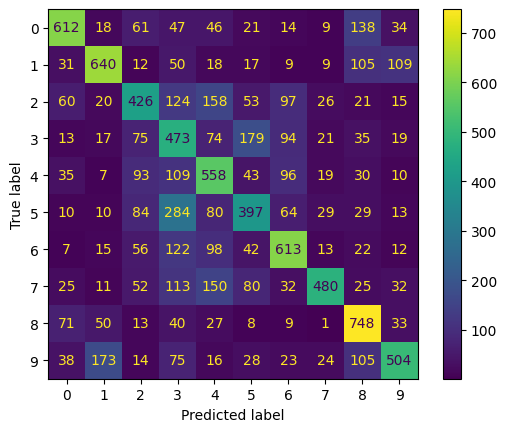

In [54]:
preds = [pred.detach().cpu().numpy() for pred in preds]
trues = [true.detach().cpu().numpy() for true in trues]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(trues, preds)).plot()
plt.show()

MNIST

In [45]:
from torchvision.datasets import MNIST

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

mnist_data_train = MNIST("dataset/", train = True, download=True, transform=transform)
mnist_data_test = MNIST("dataset/",train = False, download=True, transform=transform)

train_data_loader_mnist = torch.utils.data.DataLoader(mnist_data_train,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=8,
                                          )


test_data_loader_mnist = torch.utils.data.DataLoader(mnist_data_test,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=8,
                                          )                                        

In [48]:
for input, output in train_data_loader_mnist:
    print(input.shape)
    print(output.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [56]:
vit_mnist = ViT(channels=1, img_size=28, patch_size=14, emb_dim=768, d_ff=3072, n_layers=12, out_dim=10, heads=12)

In [57]:
criterion = torch.nn.CrossEntropyLoss()
# optimizer = Adam(vit.parameters())
optimizer = torch.optim.SGD(vit_mnist.parameters(), lr=0.001, momentum=0.9)

In [58]:
from utils.train import train

train(vit_mnist, train_data_loader_mnist, test_data_loader_mnist, criterion, optimizer, 60, patience=5)

Epoch...0/60: 100%|██████████| 3750/3750 [03:38<00:00, 17.19batch/s, loss=1.68]


Epoch 1/60, Train Loss: 1.6809, Validation Loss: 1.5576


Epoch...1/60: 100%|██████████| 3750/3750 [03:38<00:00, 17.14batch/s, loss=1.55]


Epoch 2/60, Train Loss: 1.5481, Validation Loss: 1.5197


Epoch...2/60: 100%|██████████| 3750/3750 [03:48<00:00, 16.42batch/s, loss=1.52]


Epoch 3/60, Train Loss: 1.5235, Validation Loss: 1.5108


Epoch...3/60: 100%|██████████| 3750/3750 [03:28<00:00, 17.99batch/s, loss=1.51]


Epoch 4/60, Train Loss: 1.5115, Validation Loss: 1.5091


Epoch...4/60: 100%|██████████| 3750/3750 [03:32<00:00, 17.65batch/s, loss=1.5] 


Epoch 5/60, Train Loss: 1.5027, Validation Loss: 1.4961


Epoch...5/60: 100%|██████████| 3750/3750 [03:23<00:00, 18.43batch/s, loss=1.5] 


Epoch 6/60, Train Loss: 1.4972, Validation Loss: 1.4958


Epoch...6/60: 100%|██████████| 3750/3750 [03:22<00:00, 18.50batch/s, loss=1.49]


Epoch 7/60, Train Loss: 1.4928, Validation Loss: 1.5040


Epoch...7/60: 100%|██████████| 3750/3750 [03:27<00:00, 18.05batch/s, loss=1.49]


Epoch 8/60, Train Loss: 1.4897, Validation Loss: 1.4870


Epoch...8/60: 100%|██████████| 3750/3750 [03:26<00:00, 18.14batch/s, loss=1.49]


Epoch 9/60, Train Loss: 1.4879, Validation Loss: 1.4873


Epoch...9/60: 100%|██████████| 3750/3750 [03:35<00:00, 17.39batch/s, loss=1.49]


Epoch 10/60, Train Loss: 1.4855, Validation Loss: 1.4868


Epoch...10/60: 100%|██████████| 3750/3750 [03:30<00:00, 17.84batch/s, loss=1.48]


Epoch 11/60, Train Loss: 1.4830, Validation Loss: 1.4857


Epoch...11/60: 100%|██████████| 3750/3750 [03:29<00:00, 17.92batch/s, loss=1.48]


Epoch 12/60, Train Loss: 1.4812, Validation Loss: 1.4849


Epoch...12/60: 100%|██████████| 3750/3750 [03:22<00:00, 18.52batch/s, loss=1.48]


Epoch 13/60, Train Loss: 1.4808, Validation Loss: 1.4815


Epoch...13/60: 100%|██████████| 3750/3750 [03:35<00:00, 17.39batch/s, loss=1.48]


Epoch 14/60, Train Loss: 1.4792, Validation Loss: 1.4846


Epoch...14/60: 100%|██████████| 3750/3750 [03:53<00:00, 16.09batch/s, loss=1.48]


Epoch 15/60, Train Loss: 1.4791, Validation Loss: 1.4787


Epoch...15/60: 100%|██████████| 3750/3750 [03:58<00:00, 15.71batch/s, loss=1.48]


Epoch 16/60, Train Loss: 1.4770, Validation Loss: 1.4813


Epoch...16/60: 100%|██████████| 3750/3750 [03:55<00:00, 15.91batch/s, loss=1.48]


Epoch 17/60, Train Loss: 1.4762, Validation Loss: 1.4818


Epoch...17/60: 100%|██████████| 3750/3750 [03:52<00:00, 16.10batch/s, loss=1.47]


Epoch 18/60, Train Loss: 1.4749, Validation Loss: 1.4794


Epoch...18/60: 100%|██████████| 3750/3750 [03:29<00:00, 17.86batch/s, loss=1.47]


Epoch 19/60, Train Loss: 1.4739, Validation Loss: 1.4812


Epoch...19/60: 100%|██████████| 3750/3750 [03:26<00:00, 18.16batch/s, loss=1.47]


Epoch 20/60, Train Loss: 1.4744, Validation Loss: 1.4821
Early stopping after 20 epochs without improvement.


In [59]:
vit_mnist.eval()

correct_predictions = 0
total_samples = 0

vit_mnist = vit_mnist.to('cuda')

preds = []
trues = []

with torch.no_grad():
    for inputs, labels in test_data_loader_mnist:
        # Convert inputs and labels to torch tensors if they are not already
        # inputs = inputs.float()
        # labels = labels.long()

        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        trues.extend(labels)

        # Forward pass
        outputs = vit_mnist(inputs)

        # Calculate accuracy
        _, predicted_labels = torch.max(outputs, 1)
        preds.extend(predicted_labels)

        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

c:\Users\damig\anaconda3\envs\pracownia_naukowa\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 98.00%


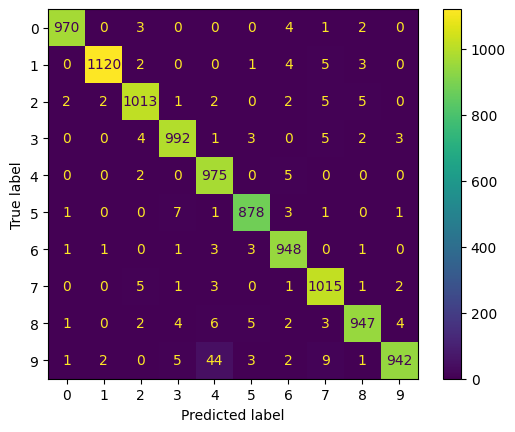

In [60]:
preds = [pred.detach().cpu().numpy() for pred in preds]
trues = [true.detach().cpu().numpy() for true in trues]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(trues, preds)).plot()
plt.show()

Save models

In [61]:
torch.save(vit.state_dict(), 'models/vit_cifar10')
torch.save(vit_mnist.state_dict(), 'models/vit_mnist')

Experimenting with decoder

In [3]:
vit_mnist_gen = ViT(channels=1, img_size=28, patch_size=14, emb_dim=768, d_ff=3072, n_layers=12, out_dim=14, heads=12)

In [4]:
batch_size = 32

In [5]:
summary(vit_mnist_gen, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                             Output Shape              Param #
ViT                                                [32, 1, 28, 28]           4,608
├─PatchEmbedding: 1-1                              [32, 4, 768]              --
│    └─Sequential: 2-1                             [32, 4, 768]              --
│    │    └─Rearrange: 3-1                         [32, 4, 196]              --
│    │    └─Linear: 3-2                            [32, 4, 768]              151,296
├─ModuleList: 1-2                                  --                        --
│    └─EncoderLayer: 2-2                           [32, 4, 768]              --
│    │    └─MultiHeadSelfAttentionBlock: 3-3       [32, 4, 768]              2,363,904
│    │    └─Dropout: 3-4                           [32, 4, 768]              --
│    │    └─LayerNorm: 3-5                         [32, 4, 768]              1,536
│    │    └─FeedForward: 3-6                       [32, 4, 768]              4,722,432
│    │    

In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.nn.functional import one_hot

from torch.utils.data import DataLoader

from torchvision.datasets import MNIST

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=8)

In [7]:
vit_mnist_gen = vit_mnist_gen.to('cuda')

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(vit_mnist_gen.parameters(), lr=0.001)

In [10]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    vit_mnist_gen.train()
    total_loss = 0.0

    for batch_idx, (data, _) in enumerate(train_loader):  # No labels needed for generative task
        data = data.to('cuda')

        # Create a mask for the input image (you may customize this based on your requirements)
        # mask = torch.rand_like(data) > 0.5  # Example: Randomly mask pixels
        mask = torch.ones_like(data)
        mask[:, :, :14, :14] = 0

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = vit_mnist_gen(data, mask=mask)

        # Calculate loss
        loss = criterion(output, data)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        total_loss += loss.item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {total_loss / 100:.4f}')
            total_loss = 0.0

    # Validation
    vit_mnist_gen.eval()
    total_loss = 0.0

    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(test_loader):  # No labels needed for generative task
            data = data.to('cuda')

            # Create a mask for the input image (you may customize this based on your requirements)
            mask = torch.rand_like(data) > 0.5  # Example: Randomly mask pixels

            # Forward pass
            output = vit_mnist_gen(data, mask=mask)

            # Calculate loss
            loss = criterion(output, data)

            total_loss += loss.item()

    average_loss = total_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {average_loss:.4f}')

print("Training finished.")


torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])


RuntimeError: The size of tensor a (28) must match the size of tensor b (4) at non-singleton dimension 3